# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

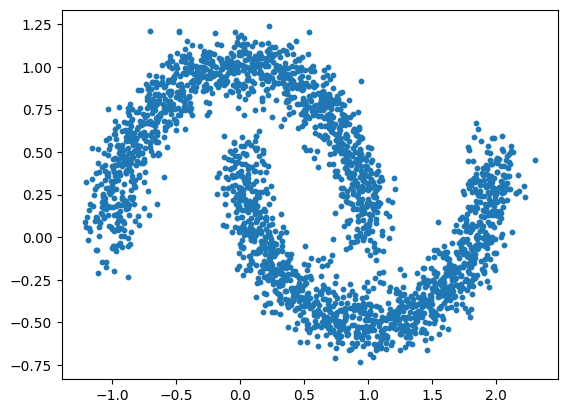

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 1,
    'p_lim': 0.5,
    'batch_size': 128,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 155 | Loss: 1.0676 | p-value: 5.45E-01:  31%|███       | 154/500 [18:48<42:16,  7.33s/it]


Early stopping at epoch 155
Shapiro-Wilk p-value:	0.5454758255383836


0.5454758255383836

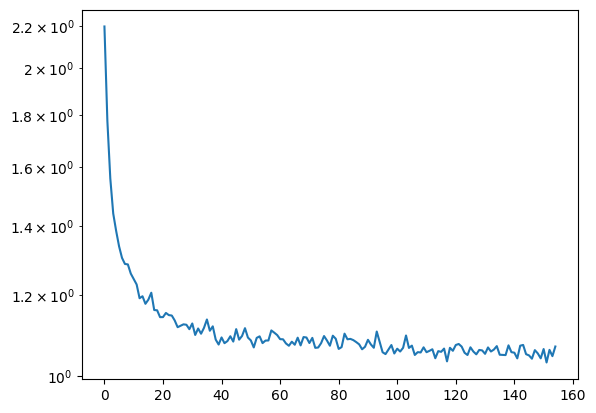

In [5]:
plt.plot(LAM.loss_history)
plt.yscale('log')

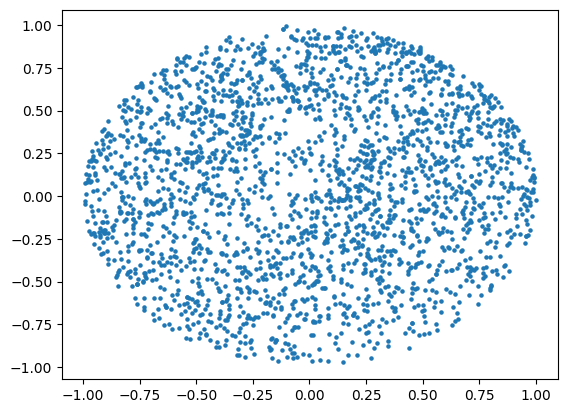

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 1597, 1934, 1401,  337,  370, 1707, 2330, 1891,  589, 1379,
         1987, 1596, 1231, 2446,  170, 2297,  708,  238, 1495, 2068, 2454,
          278,  951, 1454], dtype=int64)],
 [array([0.        , 0.00054813, 0.00072922, 0.00124778, 0.0015264 ,
         0.00177143, 0.00178594, 0.00194203, 0.00240543, 0.00245129,
         0.0024763 , 0.00257687, 0.00272574, 0.00287474, 0.0028918 ,
         0.00296652, 0.00307792, 0.00310166, 0.0031459 , 0.00317615,
         0.00318441, 0.00319167, 0.00320152, 0.00323796, 0.00323924])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 1597, 1934, 1401,  337], dtype=int64),
  array([   2, 1175, 1881,   51, 1403], dtype=int64),
  array([   5,  584, 1767, 1279, 2273], dtype=int64)],
 [array([0.        , 0.00054813, 0.00072922, 0.00124778, 0.0015264 ]),
  array([0.        , 0.00061135, 0.00088533, 0.00099443, 0.0010702 ]),
  array([0.        , 0.00036349, 0.00081068, 0.00111398, 0.00132526])])

In [9]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.03055722566205077


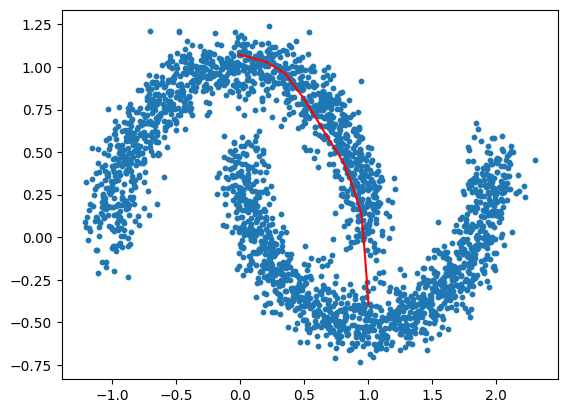

In [10]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

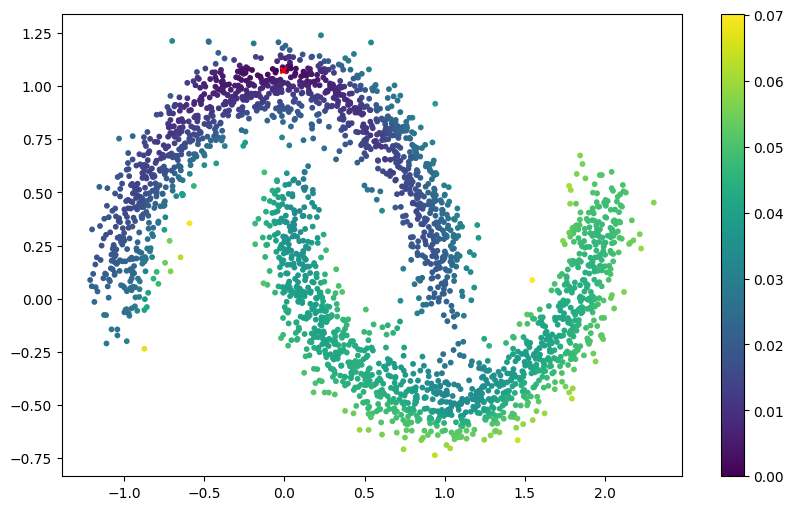

In [11]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
